<center>
    <h1>PHÂN TÍCH QUY MÔ THỊ TRƯỜNG XE ĐIỆN</h1>
</center>

---

**VỀ BỘ DỮ LIỆU**

Bộ dữ liệu cung cấp các cột sau đây, mỗi cột thể hiện các khía cạnh khác nhau về dân số xe điện (EV) tại Hoa Kỳ:
- VIN (1-10): Một phần số nhận dạng xe.
- Country: Quốc gia nơi xe được đăng ký.
- City: Thành phố nơi xe được đăng ký.
- State: Bang nơi xe được đăng ký. Dữ liệu này có vẻ tập trung vào bang Washington (WA).
- Postal Code: Mã bưu chính nơi xe được đăng ký.
- Model Year: Năm sản xuất mẫu xe.
- Make: Nhà sản xuất của xe.
- Model: Mẫu xe.
- Electric Vehicle Type: Loại xe điện, ví dụ: Xe điện chạy pin (Battery Electric Vehicle - BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Trạng thái đủ điều kiện cho các chương trình xe nhiên liệu thay thế sạch.
- Electric Range: Quãng đường tối đa xe có thể di chuyển chỉ với một lần sạc (tính bằng dặm).
- Base MSRP: Giá bán lẻ đề xuất của nhà sản xuất.
- Legislative District: Khu vực bầu cử nơi xe được đăng ký.
- DOL Vehicle ID: Mã nhận dạng phương tiện của Sở cấp phép.
- Vehicle Location: Tọa độ địa lý của vị trí xe.
- Electric Utility: Nhà cung cấp dịch vụ điện tại vị trí của xe.
- 2020 Census Tract: Khu vực điều tra dân số năm 2020 tại vị trí của xe.

In [31]:
# Gọi các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')

### 1. Đọc và hiển thị dữ liệu:
---

In [2]:
# Đọc dữ liệu và hiển thị thông tin
df_eleccar = pd.read_csv('Data/Electric_Vehicle_Population_Data.csv')
df_eleccar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
# Hiển thị 5 dòng dữ liệu đầu tiên
df_eleccar.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
# HIển thị 5 dòng dữ liệu cuối
df_eleccar.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


## 2. Khám phá tập dữ liệu
---

In [5]:
# Quan sát các thuộc tính số của dữ liệu:
df_eleccar.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
# Quan sát các thuộc tính obj của dữ liệu
df_eleccar.describe(include='O')

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,177866,177861,177861,177866,177866,177866,177866,177866,177857,177861
unique,10830,196,723,46,40,139,2,3,861,76
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1239,92740,29447,177477,79659,35989,139210,91950,4574,65990


In [7]:
# Quan sát thuộc tính các loại xe điện
df_eleccar['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

**Có 2 loại xe điện:**
- Battery Electric Vehicle (BEV): Xe điện chạy pin
- Plug-in Hybrid Electric Vehicle (PHEV): Xe điện kết hợp 

In [8]:
# Quan sát thuộc tính
df_eleccar['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

**Điều kiện đủ để trở thành Xe Nhiên liệu Thay thế Sạch (CAFV):**
- Clean Alternative Fuel Vehicle Eligible: Xe sử dụng nhiên liệu sạch, đủ điều kiện
- Eligibility unknown as battery range has not been researched: Chưa rõ vì phạm vi pin chưa được nghiên cứu
- Not eligible due to low battery range: Không đủ điều kiện vì phạm vi pin yếu


In [9]:
# Kiểm tra dữ liệu thiếu
df_eleccar.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [10]:
# Quan sát một vài dữ liệu thiếu của Legislative District
df_eleccar[df_eleccar['Legislative District'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
57115,1G1FZ6S00K,Washoe,Reno,NV,89521.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,NaN,231094930,POINT (-119.74505 39.436555),NON WASHINGTON STATE ELECTRIC UTILITY,3.203100e+10
75427,5YJSA1E54P,District of Columbia,Washington,DC,20003.0,2023,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,238713044,POINT (-76.985835 38.88411),NON WASHINGTON STATE ELECTRIC UTILITY,1.100101e+10
78159,3FA6P0PU8F,Kern,Ridgecrest,CA,93555.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,475775205,POINT (-117.67228 35.62073),NON WASHINGTON STATE ELECTRIC UTILITY,6.029005e+09
79645,5UXKT0C36H,Cumberland,Fayetteville,NC,28305.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,NaN,110287313,POINT (-78.90195 35.058245),NON WASHINGTON STATE ELECTRIC UTILITY,3.705100e+10
79711,2C4RC1H78J,Oldham,Goshen,KY,40026.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NaN,277234681,POINT (-85.5824778 38.4053653),NON WASHINGTON STATE ELECTRIC UTILITY,2.118503e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177492,5YJ3E1EB4J,Jefferson,Watertown,NY,13603.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,151504335,POINT (-75.8131886 44.045225),NON WASHINGTON STATE ELECTRIC UTILITY,3.604506e+10
177532,7SAXCBE62N,Loudoun,Aldie,VA,20105.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,198763512,POINT (-77.55783 38.9221),NON WASHINGTON STATE ELECTRIC UTILITY,5.110761e+10
177682,5YJ3E1EC2P,Frederick,Frederick,MD,21701.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,244377416,POINT (-77.409075 39.416495),NON WASHINGTON STATE ELECTRIC UTILITY,2.402175e+10
177785,JTMEB3FV8P,Frederick,Middletown,MD,21769.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,251425919,POINT (-77.54559 39.44235),NON WASHINGTON STATE ELECTRIC UTILITY,2.402175e+10


**PHƯƠNG ÁN XỬ LÝ DỮ LIỆU KHUYẾT THIẾU**

- Xóa các bản ghi thiếu dữ liệu
- Tìm giá trị xuất hiện nhiều nhất (Giá trị phổ biến) điền vào bản ghi thiếu
- Tìm giá trị trung bình điền vào bản ghi thiếu
  

**Xử lý giá trị khuyết thiếu**

In [11]:
# Xóa đi các bản ghi khuyết thiếu
df_eleccar = df_eleccar.dropna()

In [12]:
# Kiểm tra lại dữ liệu thiếu
df_eleccar.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**Xử lý đặc trưng: Trích xuất vĩ độ và kinh độ**  
Trong tập dữ liệu, cột **Vehicle Location** chứa cả tọa độ vĩ độ và kinh độ dưới dạng chuỗi. Để làm cho các tọa độ này dễ dàng sử dụng hơn cho các phân tích tiếp theo, chúng ta sẽ thực hiện các bước xử lý đặc trưng sau:  

1. Chuyển cột **Vehicle Location** sang kiểu chuỗi.  
2. Tạo hai cột mới trong DataFrame, **latitude** (vĩ độ) và **longitude** (kinh độ).  
3. Trích xuất các giá trị vĩ độ và kinh độ từ cột **Vehicle Location** và lưu chúng vào các cột mới tương ứng.  

Để thực hiện việc này, chúng ta định nghĩa một hàm có tên là `extract_coordinates()`, hàm này nhận hai tham số: chuỗi đầu vào (chứa tọa độ) và chỉ số (0 cho vĩ độ và 1 cho kinh độ). Hàm này sử dụng biểu thức chính quy (regular expressions) để tìm và trả về các số dạng dấu phẩy động đại diện cho tọa độ. Sau đó, chúng ta sử dụng hàm `apply()` để áp dụng hàm này cho từng phần tử của cột **Vehicle Location** và điền dữ liệu vào các cột mới **latitude** và **longitude**.  

Cuối cùng, chúng ta loại bỏ các hàng có giá trị thiếu trong các cột **latitude** và **longitude** để đảm bảo tập dữ liệu sạch cho các phân tích tiếp theo.  

In [13]:
# kiểm tra kiểu dữ liệu
df_eleccar['Vehicle Location'].info()

<class 'pandas.core.series.Series'>
Index: 177473 entries, 0 to 177865
Series name: Vehicle Location
Non-Null Count   Dtype 
--------------   ----- 
177473 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


In [14]:
# Chuyển đổi cột 'Vehicle Location' sang kiểu string
df_eleccar['Vehicle Location'] = df_eleccar['Vehicle Location'].astype(str)

# Trích xuất vĩ độ và kinh độ từ cột
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

df_eleccar['latitude'] = df_eleccar['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
df_eleccar['longitude'] = df_eleccar['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

df_eleccar = df_eleccar.dropna(subset=['latitude', 'longitude'])

In [15]:
# Quan sát 2 cột mới vừa trích xuất dữ liệu từ cột chính
df_eleccar[['Vehicle Location', 'latitude', 'longitude']]

,Vehicle Location,latitude,longitude
0,POINT (-122.30839 47.610365),-122.308390,47.610365
1,POINT (-122.179458 47.802589),-122.179458,47.802589
2,POINT (-122.34848 47.632405),-122.348480,47.632405
3,POINT (-122.03646 47.534065),-122.036460,47.534065
4,POINT (-122.55717 47.733415),-122.557170,47.733415
...,...,...,...
177861,POINT (-122.183805 47.18062),-122.183805,47.180620
177862,POINT (-123.105305 47.211085),-123.105305,47.211085
177863,POINT (-119.8493873 47.2339933),-119.849387,47.233993
177864,POINT (-122.00451 47.312185),-122.004510,47.312185


**Xử lý đặc trưng: Tạo cột 'Location'**  
Trong tập dữ liệu, chúng ta có ba cột đại diện cho các cấp phân chia địa lý khác nhau: **County** (hạt/quận), **City** (thành phố), và **State** (bang). Để tạo một biểu diễn tổng hợp và giàu thông tin hơn cho các thuộc tính địa lý này, chúng ta sẽ tạo một cột mới có tên là **Location**.  

Cột **Location** sẽ là sự kết hợp (concatenation) của ba cột **County**, **City**, và **State**, với mỗi giá trị được phân tách bởi dấu phẩy. Ví dụ, nếu một hàng có các giá trị **"Yakima"** cho cột **County**, **"Yakima"** cho cột **City**, và **"WA"** cho cột **State**, thì giá trị tương ứng trong cột **Location** sẽ là **"Yakima, Yakima, WA"**.

In [16]:
# đổi các cột qua kiểu str, kêt hợp lại thành một cột mới
df_eleccar['Location'] = (
    df_eleccar['County'].astype(str) + ', ' +
    df_eleccar['City'].astype(str) + ', ' +
    df_eleccar['State'].astype(str)
)

In [17]:
df_eleccar[['Location']]

,Location
0,"King, Seattle, WA"
1,"Snohomish, Bothell, WA"
2,"King, Seattle, WA"
3,"King, Issaquah, WA"
4,"Kitsap, Suquamish, WA"
...,...
177861,"Pierce, Bonney Lake, WA"
177862,"Mason, Shelton, WA"
177863,"Grant, Quincy, WA"
177864,"King, Black Diamond, WA"


**Xử lý đặc trưng: Tạo cột Price_Range_Category**  

Trong tập dữ liệu, chúng ta nhận thấy một phân phối bất thường trong cột **Base MSRP**, với một số lượng lớn các giá trị bằng **0**. Điều này có thể chỉ ra các giá trị bị thiếu hoặc không xác định. Để xử lý sự không chắc chắn này và vẫn tận dụng được dữ liệu hiện có, chúng ta quyết định tạo một cột mới có tên **Price_Range_Category** dựa trên giá trị của cột **Base MSRP**.

Chúng ta định nghĩa bốn danh mục cho cột **Price_Range_Category** như sau:
- **"Unknown"**: Nếu giá trị của **Base MSRP** là **0**, chúng ta gán danh mục này vì nó có thể chỉ ra giá trị bị thiếu hoặc không xác định.
- **"Low"**: Nếu giá trị của **Base MSRP** nhỏ hơn **40,000**, chúng ta gán danh mục này.
- **"Medium"**: Nếu giá trị của **Base MSRP** nằm trong khoảng từ **40,000** đến **60,000**, chúng ta gán danh mục này.
- **"High"**: Nếu giá trị của **Base MSRP** lớn hơn **60,000**, chúng ta gán danh mục này.

Bằng cách tạo cột mới này, chúng ta có thể hiểu rõ hơn về phân phối giá của các xe điện trong tập dữ liệu và xử lý sự không chắc chắn từ các giá trị **0** trong cột **Base MSRP**.

In [18]:
df_eleccar['Base MSRP'].value_counts()
# có một lượng lớn giá trị 0

Base MSRP
0         174142
69900       1366
31950        381
52900        222
32250        136
59900        127
54950        126
39995        111
36900        104
44100         91
45600         82
64950         81
33950         76
52650         68
34995         65
36800         55
55700         54
53400         37
81100         23
110950        20
98950         19
90700         18
75095         13
102000        12
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
845000         1
Name: count, dtype: int64

In [19]:
# Định nghĩa hàm chuyển đổi giá trị để tạo cột Price_Range_Category
def create_price_range_category(df_eleccar, column='Base MSRP'):
    # Hàm con để phân loại giá trị Base MSRP thành các danh mục
    def categorize_price(price):
        if price == 0:
            return "Unknown"  # Gán "Unknown" nếu giá trị bằng 0 (giá trị không xác định)
        elif price < 40000:
            return "Low"  # Gán "Low" nếu giá trị nhỏ hơn 40,000
        elif price < 60000:
            return "Medium"  # Gán "Medium" nếu giá trị nằm giữa 40,000 và 60,000
        else:
            return "High"  # Gán "High" nếu giá trị lớn hơn 60,000

    # Áp dụng hàm con categorize_price cho cột 'Base MSRP' để tạo cột Price_Range_Category
    df_eleccar['Price_Range_Category'] = df_eleccar[column].apply(categorize_price)
    
    # Trả về DataFrame sau khi thêm cột mới
    return df_eleccar

# Gọi hàm create_price_range_category để tạo cột Price_Range_Category trong DataFrame
df_eleccar = create_price_range_category(df_eleccar, column='Base MSRP')

**Xử lý đặc trưng: Tạo cột 'Electric_Range_Category'**  

Trong tập dữ liệu, chúng ta nhận thấy một phân phối bất thường trong cột **'Electric Range'**, với một số lượng lớn các giá trị bằng **0**. Điều này có thể chỉ ra các giá trị bị thiếu hoặc không xác định. Để xử lý sự không chắc chắn này và vẫn tận dụng được dữ liệu hiện có, chúng ta quyết định tạo một cột mới có tên **'Electric_Range_Category'** dựa trên các giá trị trong cột **'Electric Range'**.

Chúng ta định nghĩa bốn danh mục cho cột **'Electric_Range_Category'** như sau:
- **"Unknown"**: Nếu giá trị trong **'Electric Range'** là **0**, chúng ta gán danh mục này vì nó có thể chỉ ra giá trị bị thiếu hoặc không xác định.
- **"Short"**: Nếu giá trị trong **'Electric Range'** nhỏ hơn **150**, chúng ta gán danh mục này.
- **"Medium"**: Nếu giá trị trong **'Electric Range'** nằm trong khoảng từ **150** đến **300**, chúng ta gán danh mục này.
- **"Long"**: Nếu giá trị trong **'Electric Range'** lớn hơn **300**, chúng ta gán danh mục này.

Bằng cách tạo cột mới này, chúng ta có thể hiểu rõ hơn về phân phối phạm vi hoạt động của xe điện trong tập dữ liệu và xử lý sự không chắc chắn từ các giá trị **0** trong cột **'Electric Range'**.

In [20]:
# Hàm để tạo cột 'Electric_Range_Category' dựa trên giá trị của cột 'Electric Range'
def create_electric_range_category(df_eleccar, column='Electric Range'):
    # Hàm con để phân loại giá trị của phạm vi hoạt động (Electric Range)
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"  # Gán "Unknown" nếu giá trị là 0 (có thể là giá trị thiếu hoặc không xác định)
        elif electric_range < 150:
            return "Short"  # Gán "Short" nếu giá trị nhỏ hơn 150
        elif electric_range < 300:
            return "Medium"  # Gán "Medium" nếu giá trị nằm trong khoảng từ 150 đến dưới 300
        else:
            return "Long"  # Gán "Long" nếu giá trị lớn hơn hoặc bằng 300

    # Áp dụng hàm categorize_range lên cột chỉ định và tạo cột mới 'Electric_Range_Category'
    df_eleccar['Electric_Range_Category'] = df_eleccar[column].apply(categorize_range)
    
    # Trả về DataFrame sau khi thêm cột mới
    return df_eleccar

# Gọi hàm để tạo cột 'Electric_Range_Category' trong DataFrame
df_eleccar = create_electric_range_category(df_eleccar, column='Electric Range')

In [21]:
df_eleccar.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.308390,47.610365,"King, Seattle, WA",Unknown,Medium
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,-122.179458,47.802589,"Snohomish, Bothell, WA",Unknown,Unknown
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.348480,47.632405,"King, Seattle, WA",Unknown,Medium
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.036460,47.534065,"King, Issaquah, WA",Unknown,Medium
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,-122.557170,47.733415,"Kitsap, Suquamish, WA",Unknown,Unknown


## 3. Trực quan hóa dữ liệu
---

In [41]:
# Hàm vẽ biểu đồ:
def plot_value_counts(df, column, top_n=None):
    # Lấy số lượng giá trị cho cột đã chỉ định
    value_counts = df_eleccar[column].value_counts()
    if top_n:
        # nếu top_n được chỉ định, chỉ lấy top_n giá trị đầu tiên
        value_counts = value_counts.head(top_n)
    # Thiết lập các subplot
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Vẽ biểu đồ tròn
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle = 90, colors=sns.color_palette('pastel'))
    axes[0].set_title(f'Tỷ lệ phần trăm của {column}', fontsize=14)
        
    # Tạo biểu đồ cột (bar chart)
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Số lượng của {column}', fontsize=14)
    axes[1].set_xlabel(column)  # Gán nhãn cho trục x
    axes[1].set_ylabel('Số lượng')  # Gán nhãn cho trục y
    axes[1].tick_params(axis='x', rotation=30)  # Quay nhãn trục x

    # Thêm giá trị vào các cột trong biểu đồ
    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)
    
    # Thiết lập tiêu đề chung cho toàn bộ hình
    fig.suptitle(f'BIỂU ĐỒ PHÂN BỐ CỦA {column}', fontsize=18, y=1.03)
    
    # Hiển thị biểu đồ
    plt.show()


**Phân tích Dữ liệu Ô tô Điện: Vị trí**

Cột 'Location' trong bộ dữ liệu Ô tô Điện cung cấp thông tin về vị trí của các chiếc ô tô điện. Dưới đây là số lần xuất hiện của các giá trị trong cột 'Location':

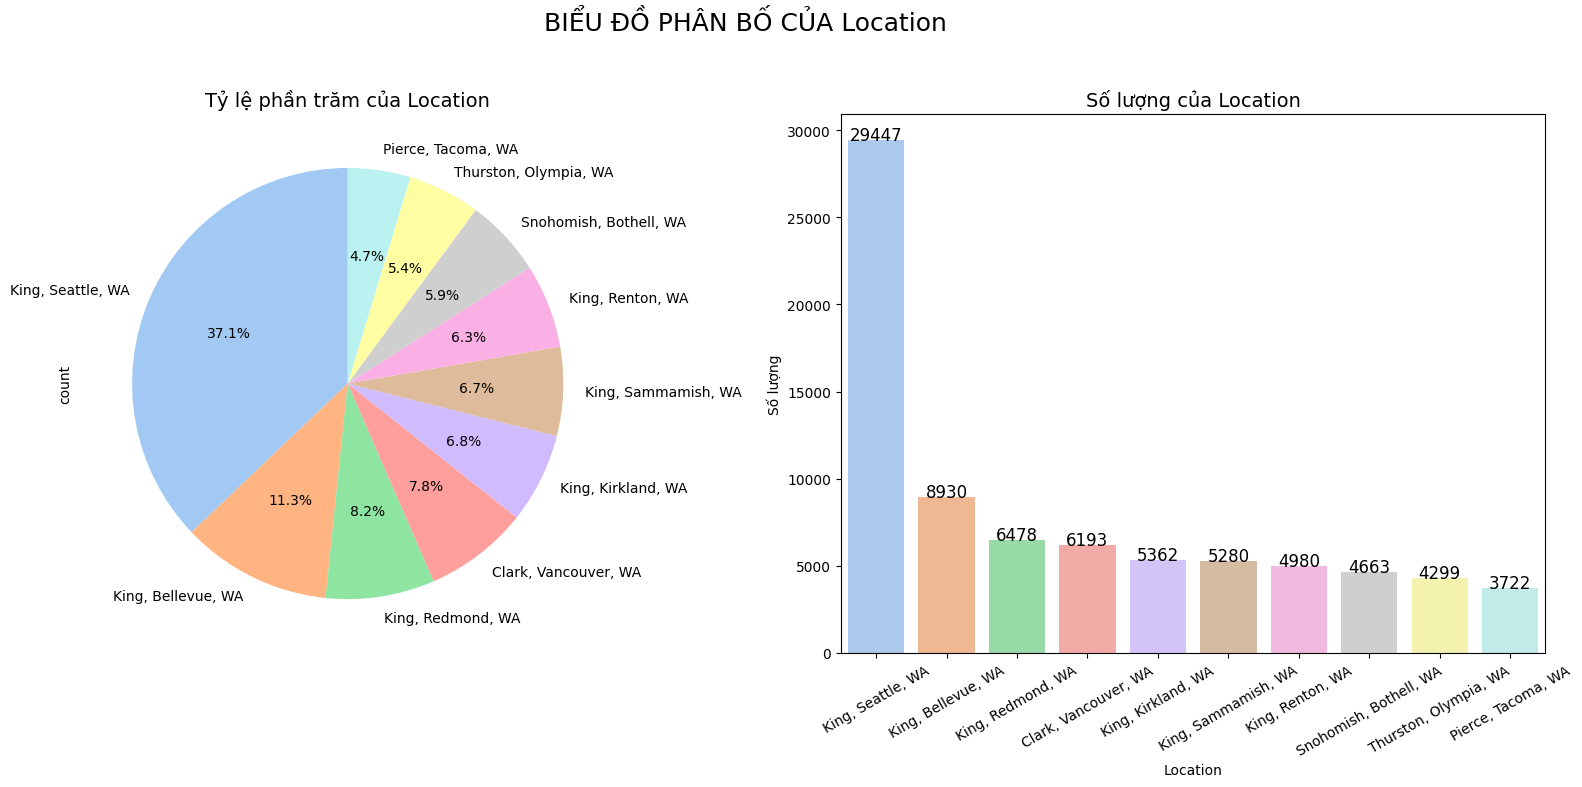

In [42]:
plot_value_counts(df_eleccar, 'Location', top_n=10)

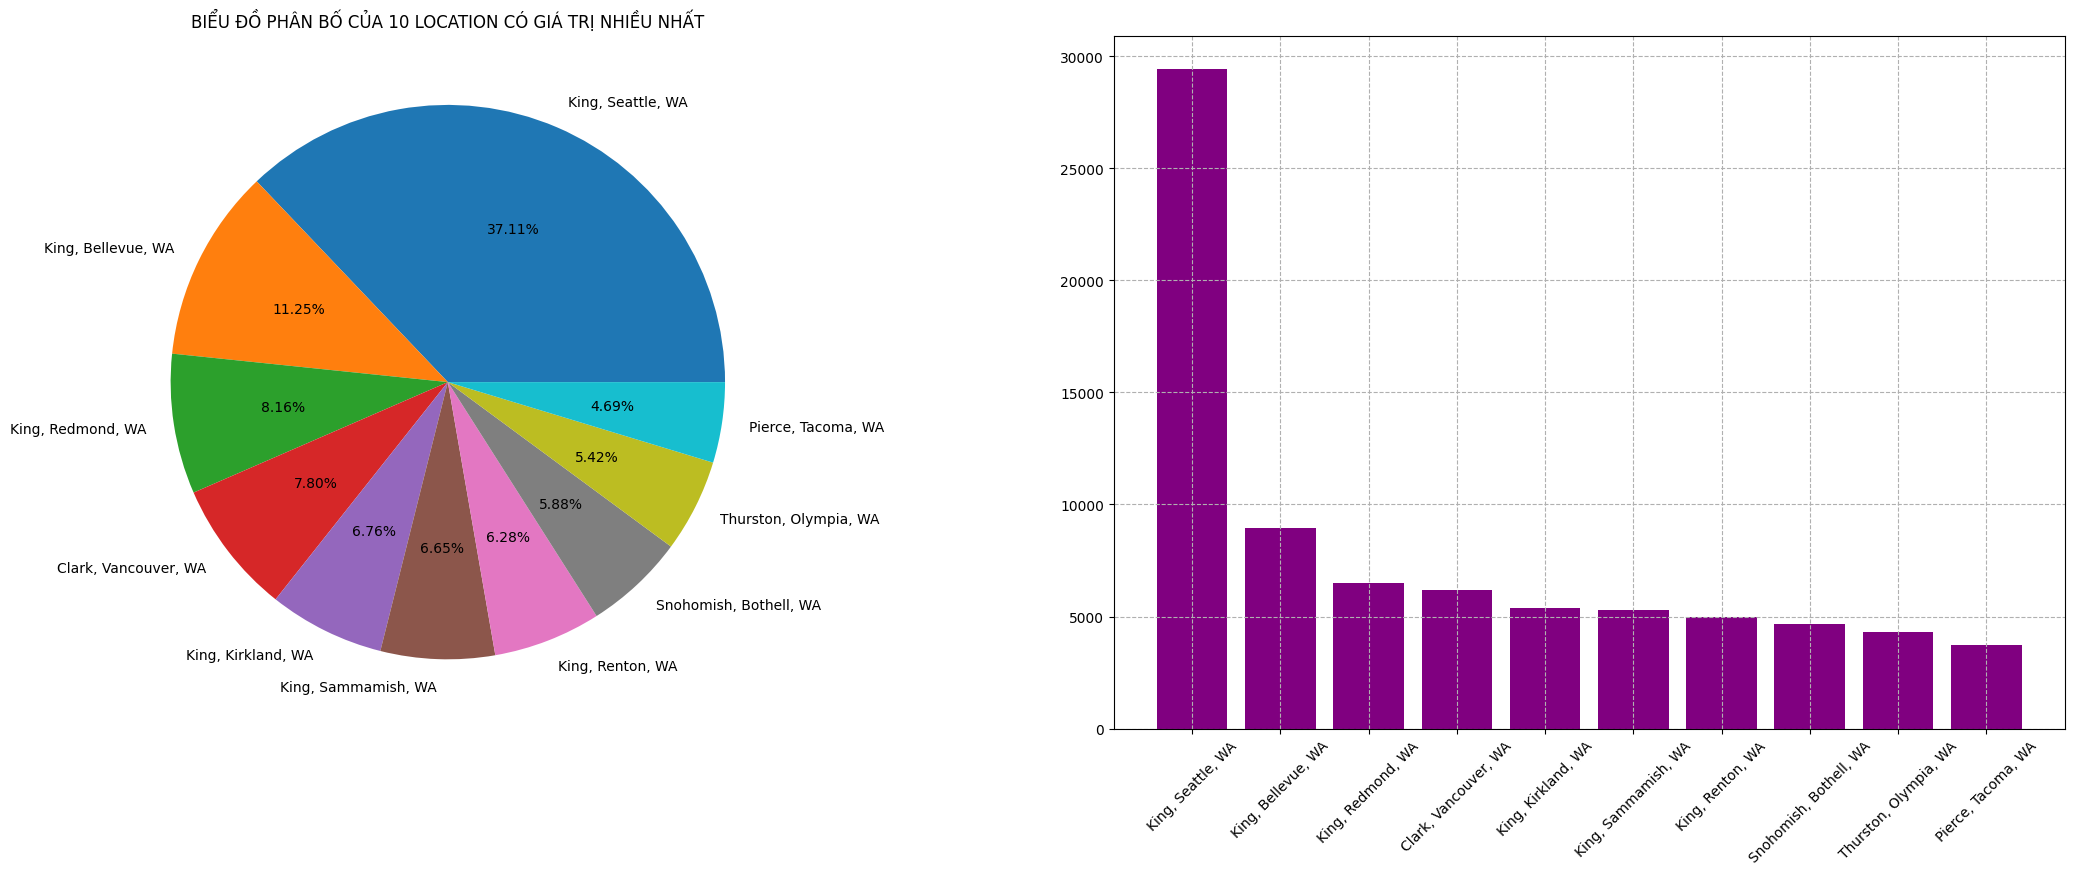

In [66]:
# Hoặc vẽ đơn giản hơn
plt.figure(figsize=(27,9))

# Lấy 10 location có giá trị nhiều nhất
location_counts = df_eleccar['Location'].value_counts().head(10)

# Vị trí 1 hàng, 2 cột ở vị trí số 1
plt.subplot(1,2,1)
# Vẽ biểu đồ tròn:
plt.pie(location_counts,
       labels=location_counts.index,
       autopct='%.2f%%')


# Vị trí 1 hàng, 2 cột ở vị trí số 2
# Vẽ biểu đồ cột
plt.subplot(1,2,2)
plt.bar(location_counts.index, location_counts, color='purple')
plt.grid(ls='--')
plt.xticks(location_counts.index, rotation=45)
plt.subplot(1,2,1)

plt.title('BIỂU ĐỒ PHÂN BỐ CỦA 10 LOCATION CÓ GIÁ TRỊ NHIỀU NHẤT')
plt.show()

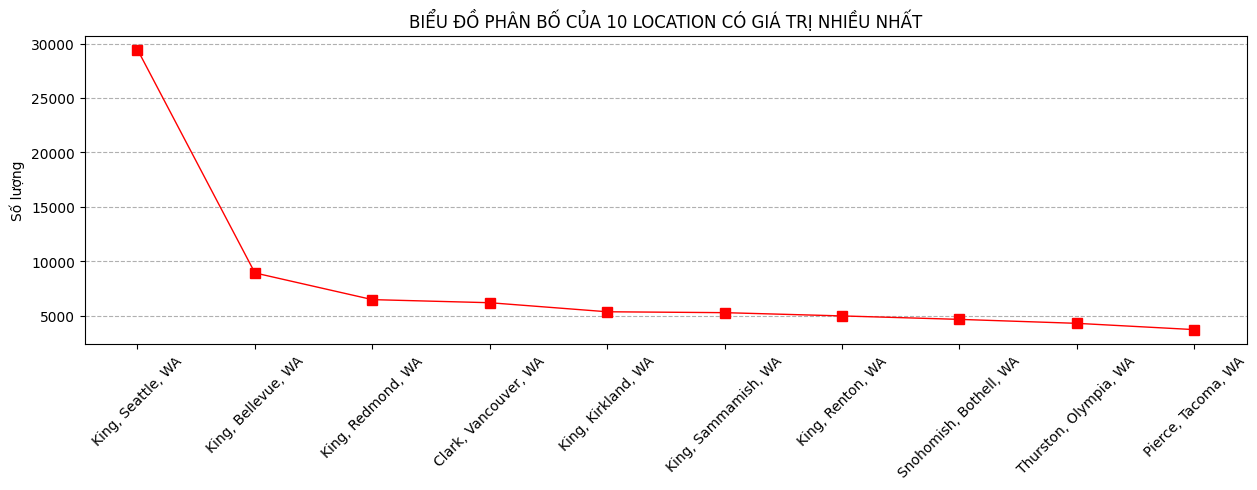

In [69]:
# Vẽ biểu đồ đường
plt.figure(figsize= (15,4))
# Vẽ biểu đồ đường
plt.plot(location_counts.index, location_counts, 'r-s', lw=1.0, ms = 7)
plt.title('BIỂU ĐỒ PHÂN BỐ CỦA 10 LOCATION CÓ GIÁ TRỊ NHIỀU NHẤT')
plt.ylabel('Số lượng')
plt.xticks(location_counts.index, rotation=45)
plt.grid(axis='y',ls='--')

plt.show()

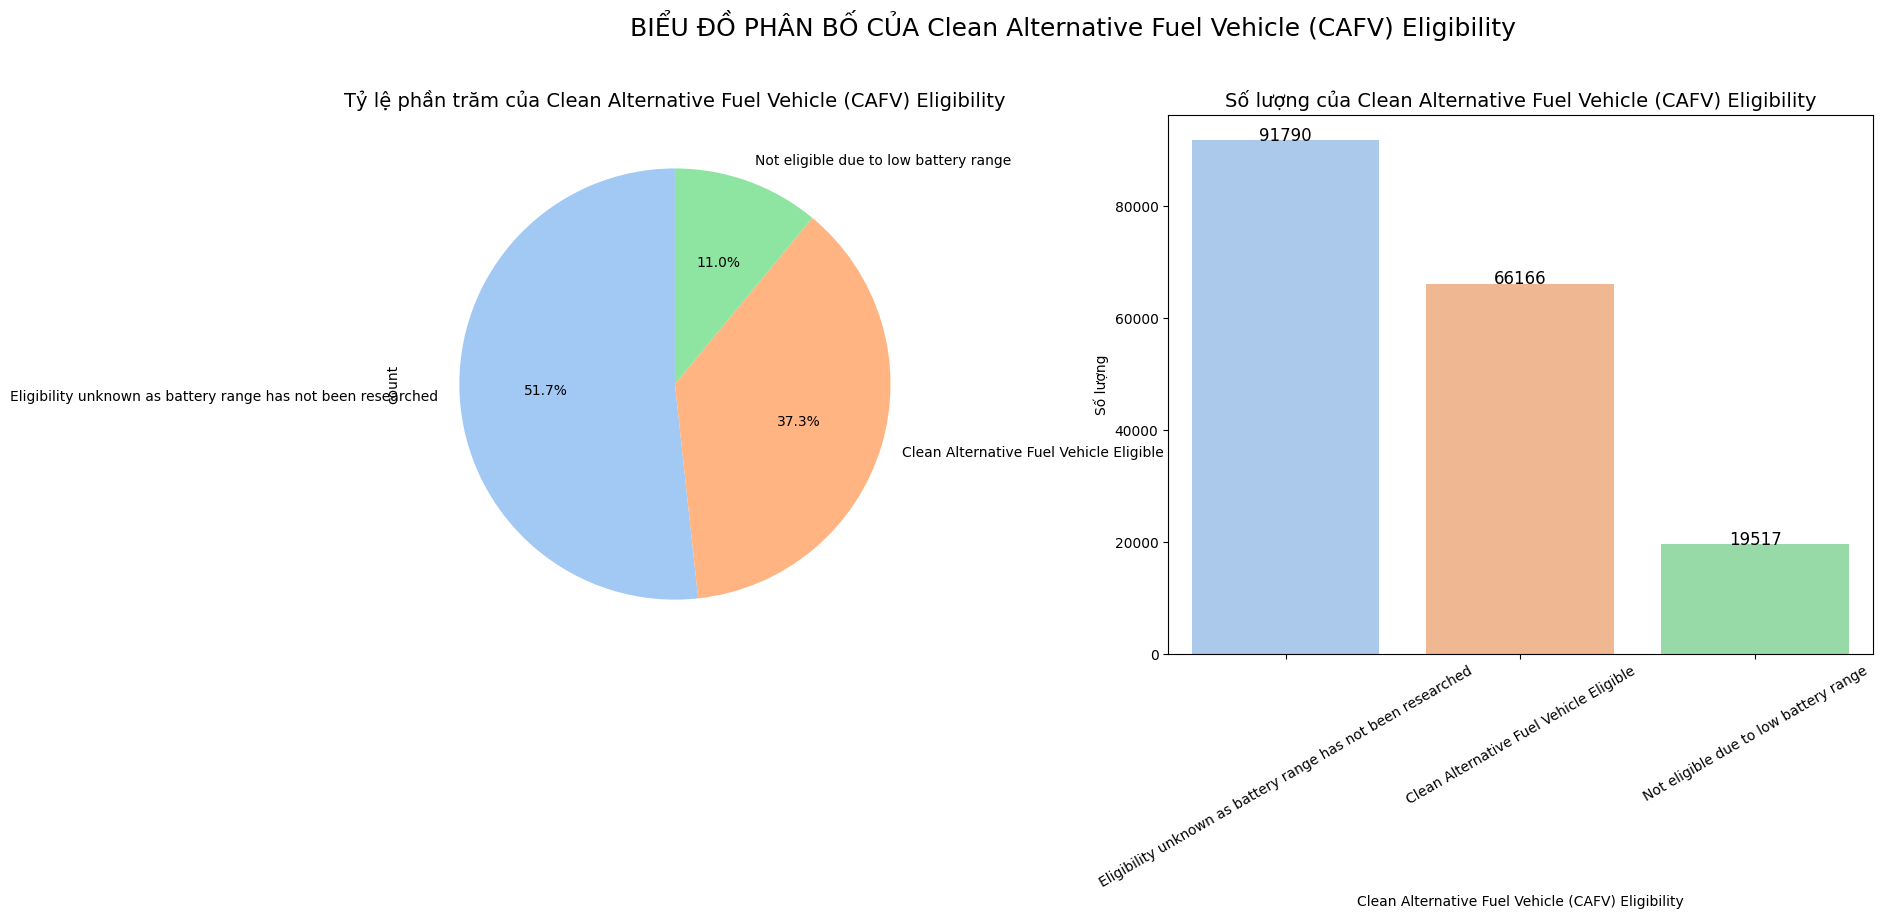

In [71]:
#Trực quan hóa giá trị Clean Alternative Fuel Vehicle (CAFV) Eligibility
plot_value_counts(df_eleccar, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')

**NHẬN XÉT**
- Xe chưa phân loại chiếm một nửa bộ dữ liệu
- Xe điện được phân loại nhiên liệu sạch cũng chiếm phần lớn